In [1]:
import requests

response=requests.get("https://api.bls.gov/publicAPI/v2/timeseries/data/492e60ad8854424eae049c3347f6175f")

In [2]:
import json
import pandas as pd
import requests

api_key = "492e60ad8854424eae049c3347f6175f"
url = f"https://api.bls.gov/publicAPI/v2/timeseries/data/?registrationkey={api_key}"
headers = {'Content-type': 'application/json'}
data = json.dumps({"seriesid": ['LNU03075570','LNU03075580','LNU03075585','LNU03075590','LNU03075595'],"startyear":"2012", "endyear":"2022"})
p = requests.post(url, data=data, headers=headers)
json_data = json.loads(p.text)

for series in json_data['Results']['series']:
    series_id = series['seriesID']
    data_rows = []
    for item in series['data']:
        year = item['year']
        period = item['period']
        value = item['value']
        footnotes = ""
        for footnote in item['footnotes']:
            if footnote:
                footnotes += footnote['text'] + ","
        if 'M01' <= period <= 'M12':
            data_rows.append([series_id, year, period, value, footnotes[:-1]])
    if len(data_rows) > 0:
        df = pd.DataFrame(data_rows, columns=["series id","year","period","value","footnotes"])
        df.to_csv(series_id + '.csv', index=False)


## Using BLS' API to find unemployment rate between 2012 and 2022

In [3]:
# Series stored as a dictionary
series_dict = {
    'LNU04076935': 'no_disabilities',
    'LNU04076950': 'people_with_disabilities',}

# Start year and end year
dates = ('2012', '2022')
months = ('Jan', 'Dec')

In [4]:
key = '492e60ad8854424eae049c3347f6175f'

In [5]:
import json

# Specify json as content type to return
headers = {'Content-type': 'application/json'}

# Submit the list of series as data
data = json.dumps({
    "seriesid": list(series_dict.keys()),
    "startyear": dates[0],
    "endyear" : dates[1],
    "startmonth" :months[0],
    "endmonth": months[1]
})

# Post request for the data
p = requests.post(
    '{}{}'.format(url, key),
    headers=headers,
    data=data).json()['Results']['series']


In [6]:
import pandas as pd

In [7]:
# Empty dataframe to fill with values
df = pd.DataFrame()

# Build a pandas series from the API results, p
for s in p:
    date_list = [f"{i['year']}-{i['period'][1:]}-01" for i in s['data']]
    df[series_dict[s['seriesID']]] = pd.Series(
        index=pd.to_datetime(sorted(date_list)),  # sort the date_list in ascending order
        data=[i['value'] for i in s['data']]
    ).astype(float)

df


,no_disabilities,people_with_disabilities
2012-01-01,5.2,10.8
2013-01-01,7.9,13.4
2014-01-01,3.6,8.0
2015-01-01,3.8,8.7
2016-01-01,4.2,10.0
2017-01-01,4.7,11.5
2018-01-01,5.2,11.7
2019-01-01,6.0,13.9
2020-01-01,7.2,14.7
2021-01-01,7.9,14.6


In [8]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [9]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [10]:
%%R

# My commonly used R imports

require('tidyverse')
require('ggrepel')

R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


R[write to console]: Loading required package: ggrepel



In [11]:
%%R

# Read data
df <- read_csv('/Users/rachelp/Downloads/Disability - Monthly change LFPR and Unemployment.csv')

Rows: 196 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): who_sixteen_to_sixtyfour, date, data_type
dbl (1): rate

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [38]:
df = pd.read_csv('/Users/rachelp/Downloads/Disability - Monthly change LFPR and Unemployment.csv')

In [39]:
df

,who_sixteen_to_sixtyfour,rate,date,data_type
0,NO,76.85,1/1/2023,Labor Force Participation Rate
1,PWD,39.65,1/1/2023,Labor Force Participation Rate
2,PWD,7.50,1/1/2023,Unemployment rate
3,NO,3.75,1/1/2023,Unemployment rate
4,PWD,39.10,12/1/2022,Labor Force Participation Rate
...,...,...,...,...
191,NO,3.65,2/1/2020,Unemployment rate
192,PWD,33.55,1/1/2020,Labor Force Participation Rate
193,NO,77.45,1/1/2020,Labor Force Participation Rate
194,PWD,8.45,1/1/2020,Unemployment rate


In [40]:
df.dtypes

who_sixteen_to_sixtyfour     object
rate                        float64
date                         object
data_type                    object
dtype: object

In [41]:
df.columns
df.columns = df.columns.str.strip()

In [42]:
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

In [43]:
df = df.sort_values('date', ascending=False)
df

,who_sixteen_to_sixtyfour,rate,date,data_type
0,NO,76.85,2023-01-01,Labor Force Participation Rate
2,PWD,7.50,2023-01-01,Unemployment rate
3,NO,3.75,2023-01-01,Unemployment rate
1,PWD,39.65,2023-01-01,Labor Force Participation Rate
4,PWD,39.10,2022-12-01,Labor Force Participation Rate
...,...,...,...,...
158,PWD,9.85,2019-02-01,Unemployment rate
160,PWD,33.05,2019-01-01,Labor Force Participation Rate
161,NO,76.95,2019-01-01,Labor Force Participation Rate
162,PWD,9.60,2019-01-01,Unemployment rate


In [44]:
df.to_csv('lfpr_and_unemployer.csv', index=False)

In [45]:
%%R

# Read data
df <- read_csv('lfpr_and_unemployer.csv')

Rows: 196 Columns: 4
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): who_sixteen_to_sixtyfour, data_type
dbl  (1): rate
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [46]:
%%R -h 1000 -w 1000

unemploy_rate_df <-  df %>% 
    filter(data_type =='Unemployment rate')

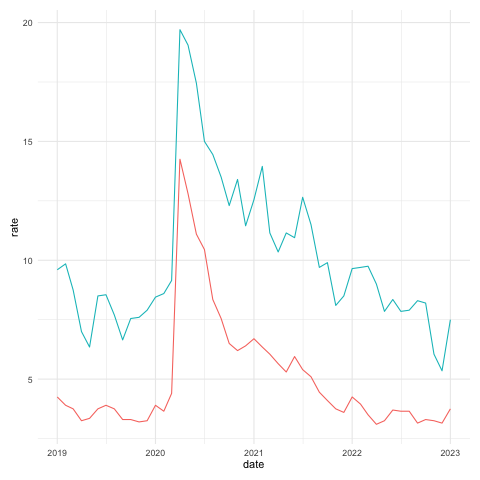

In [47]:
%%R

ggplot(unemploy_rate_df) +
  aes(y = rate, x = date, color = who_sixteen_to_sixtyfour) +
  geom_line() + 
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    plot.margin = margin(10, 10, 10, 10),
    plot.caption = element_text(hjust = 0)
  ) +
  theme(legend.position = "none")

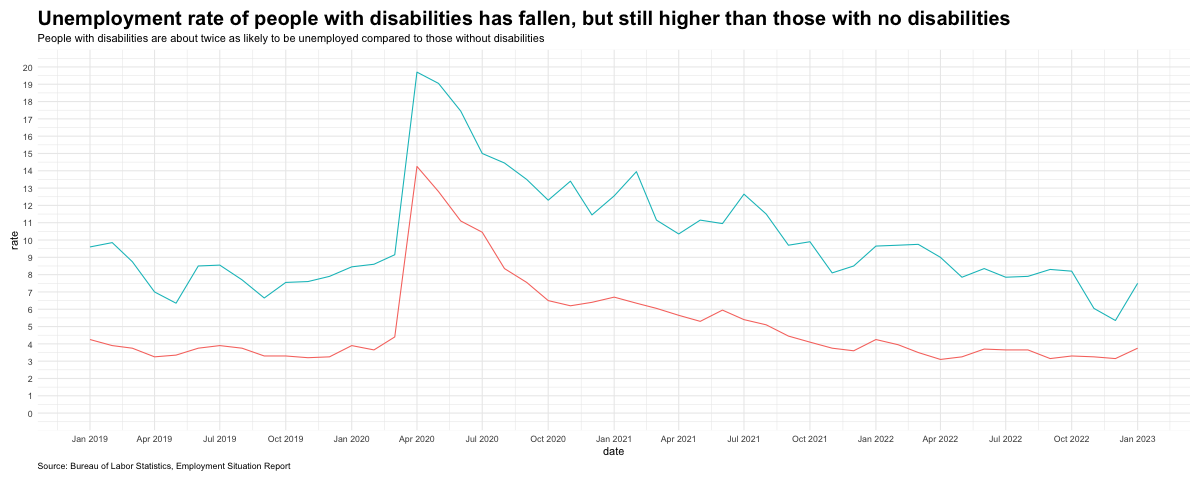

In [48]:
%%R -w 1200

ggplot(unemploy_rate_df) +
  aes(y = rate, x = date, color = who_sixteen_to_sixtyfour) +
  geom_line() + 
  scale_x_date(date_breaks = "3 months", date_labels = "%b %Y") +
  scale_y_continuous(limits = c(0, 20), breaks = seq(0, 20, by = 1)) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    plot.margin = margin(10, 10, 10, 10),
    plot.caption = element_text(hjust = 0)
  ) +
  labs(
    title = 'Unemployment rate of people with disabilities has fallen, but still higher than those with no disabilities',
    subtitle = "People with disabilities are about twice as likely to be unemployed compared to those without disabilities",
    caption = "Source: Bureau of Labor Statistics, Employment Situation Report"
  ) +
  theme(legend.position = "none")


In [49]:
%%R -w 1200

unemploy_rate_df <- ggplot(unemploy_rate_df) +
  aes(y = rate, x = date, color = who_sixteen_to_sixtyfour) +
  geom_line() + 
  scale_x_date(date_breaks = "3 months", date_labels = "%b %Y") +
  ylim(0, 20) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    plot.margin = margin(10, 10, 10, 10),
    plot.caption = element_text(hjust = 0)
  ) +
  labs(
    title = 'Unemployment rate of people with disabilities has fallen, but still higher than those with no disabilities',
    subtitle = "People with disabilities are about twice as likely to be unemployed compared to those without disabilities",
    caption = "Source: Bureau of Labor Statistics, Employment Situation Report"
  ) +
  theme(legend.position = "none")



In [52]:
%%R

ggsave("unemploy_rate_df.svg", plot = unemploy_rate_df, width = 15)


Saving 15 x 6.67 in image


In [24]:
%%R -h 1000 -w 1000

lfpr_df <-  df %>% 
    filter(data_type =='Labor Force Participation Rate')

In [53]:
%%R -w 1200 -h 400

lfpr_df <- ggplot(lfpr_df) +
  aes(y = rate, x = date, color = who_sixteen_to_sixtyfour) +
  geom_line() + 
  scale_x_date(date_breaks = "3 months", date_labels = "%b %Y") +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    plot.margin = margin(10, 10, 10, 10),
    plot.caption = element_text(hjust = 0)
  ) +
  labs(
    title = 'More people with disabilities are entering the labor force',
    subtitle = "But people with disabilities are only half as likely to be employed or are actively finding work",
    caption = "Source: Bureau of Labor Statistics, Employment Situation Report"
  ) +
  theme(legend.position = "none")


In [54]:
%%R

ggsave("lfpr_df.svg", plot = lfpr_df, width = 15)

Saving 15 x 6.67 in image


In [26]:
%%R

# Read data
wantwork_df <- read_csv('/Users/rachelp/Downloads/Disability - wantworktwo.csv')

Rows: 6 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): who, what
num (1): total_number_in_thousands

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


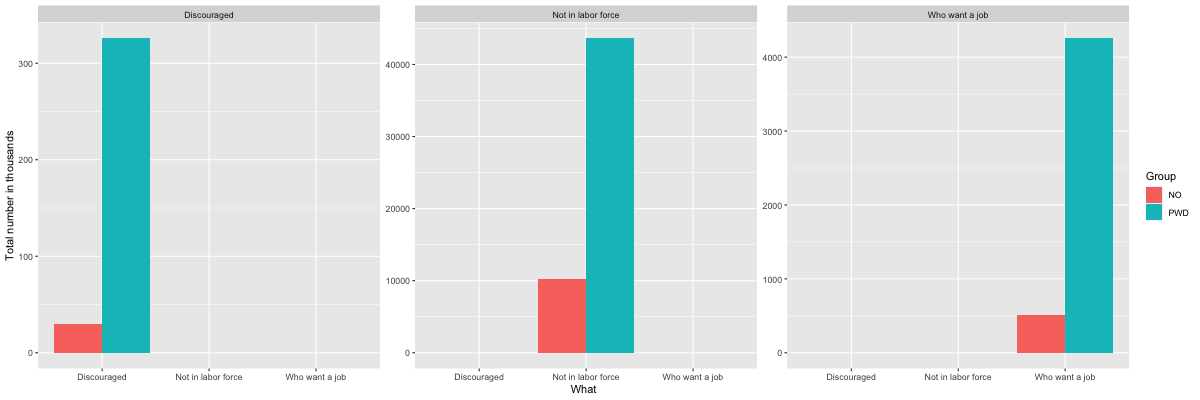

In [27]:
%%R -w 1200 -h 400

# plot the bar chart
ggplot(wantwork_df, aes(x = what, y = total_number_in_thousands, fill = who)) +
    facet_wrap(~what, scales = "free_y") +
  geom_bar(stat = "identity", position = "dodge") +
  labs(x = "What", y = "Total number in thousands", fill = "Group")

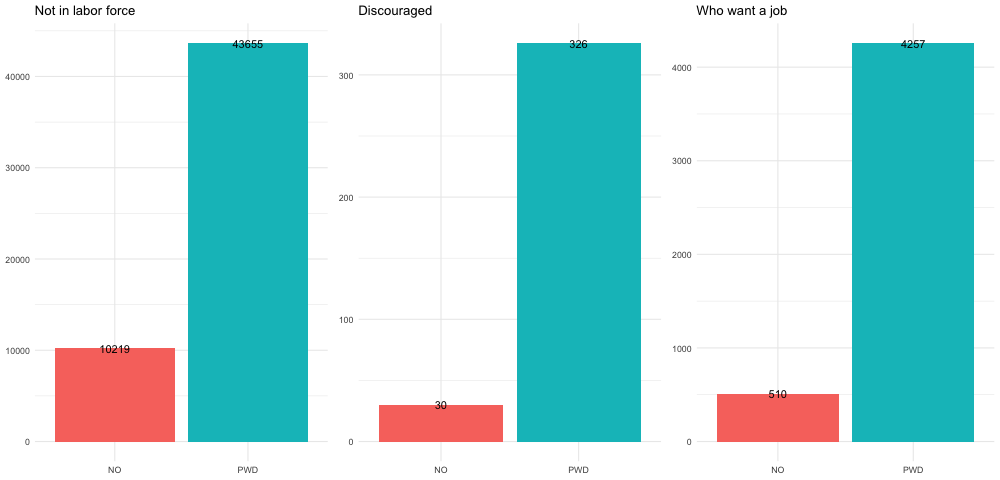

In [55]:
%%R -w 1000

library(ggplot2)
library(gridExtra)

# subset the data by each 'what' category
not_in_labor_force <- subset(wantwork_df, what == "Not in labor force")
discouraged <- subset(wantwork_df, what == "Discouraged")
want_job <- subset(wantwork_df, what == "Who want a job")

# create separate plots for each 'what' category
plot1 <- ggplot(not_in_labor_force, aes(x = who, y = total_number_in_thousands, fill = who)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = total_number_in_thousands), position = position_dodge(width = 1)) +
  ggtitle("Not in labor force") +
  theme_minimal() +
  theme(legend.position = "none", axis.title.x = element_blank(), axis.title.y = element_blank())

plot2 <- ggplot(discouraged, aes(x = who, y = total_number_in_thousands, fill = who)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = total_number_in_thousands), position = position_dodge(width = 1)) +
  ggtitle("Discouraged") +
  theme_minimal() +
  theme(legend.position = "none", axis.title.x = element_blank(), axis.title.y = element_blank())

plot3 <- ggplot(want_job, aes(x = who, y = total_number_in_thousands, fill = who)) +
  geom_bar(stat = "identity", position = "dodge") +
  geom_text(aes(label = total_number_in_thousands), position = position_dodge(width = 1)) +
  ggtitle("Who want a job") +
  theme_minimal() +
  theme(legend.position = "none", axis.title.x = element_blank(), axis.title.y = element_blank())

# combine the plots using grid.arrange() function from gridExtra package
discouraged_df <- grid.arrange(plot1, plot2, plot3, ncol = 3)

In [56]:
%%R

ggsave("discouraged_df.svg", plot = discouraged_df, height = 15, width = 10)

In [76]:
%%R

# Read data
df <- read_csv('/Users/rachelp/Downloads/Disability - Jobtypes.csv')

Rows: 12 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): who_sixteen_to_sixtyfour, occupation, subcategory, represented_rela...
dbl (2): percentage, median_hourly_wage
num (1): mean_annual_pay

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [95]:
%%R

# Read data
jobtypes_df <- read_csv('/Users/rachelp/Downloads/Disability - Jobtypes.csv')

Rows: 12 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): who_sixteen_to_sixtyfour, occupation, subcategory, represented_rela...
dbl (2): percentage, median_hourly_wage
num (1): mean_annual_pay

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [96]:
jobtypes_df = pd.read_csv('/Users/rachelp/Downloads/Disability - Jobtypes.csv')
jobtypes_df

,who_sixteen_to_sixtyfour,occupation,percentage,median_hourly_wage,mean_annual_pay,subcategory,represented_relative
0,PWD,Retail trade,13.4,14.36,"37,590",retail trade,overrepresented
1,No,Retail trade,10.2,14.36,"37,590",retail trade,overrepresented
2,PWD,Financial activities,6.2,29.44,"81,420",financial and insurance,underrepresented
3,No,Financial activities,7.0,29.44,"81,420",financial and insurance,underrepresented
4,PWD,Professional and business services,11.7,36.98,"91,150","Professional, Scientific, and Technical Service",underrepresented
5,No,Professional and business services,13.1,36.98,"91,150","Professional, Scientific, and Technical Service",underrepresented
6,PWD,Education and health services,20.7,24.10,"61,620",education,underrepresented
7,PWD,Education and health services,20.7,20.23,"60,070",health,underrepresented
8,No,Education and health services,22.4,24.10,"61,620",education,underrepresented
9,No,Education and health services,22.4,20.23,"60,070",health,underrepresented


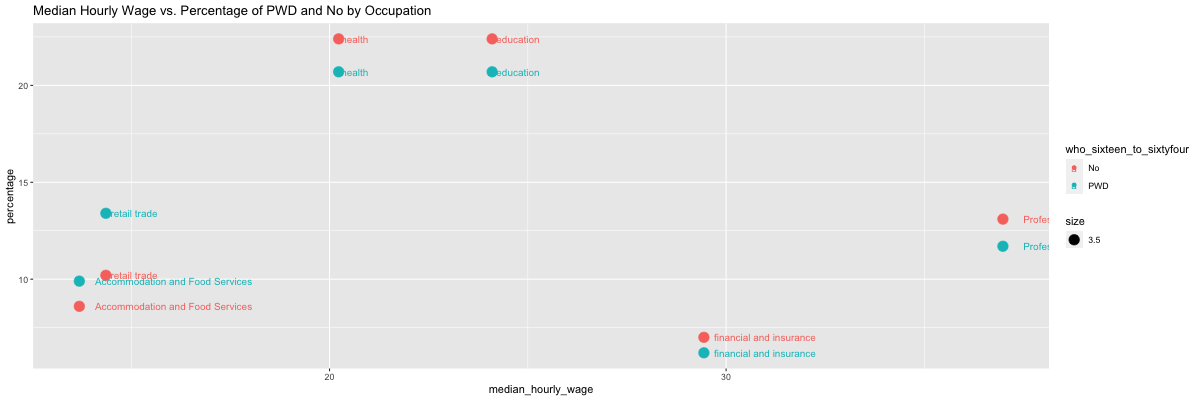

In [78]:
%%R -w 1200 -h 400

ggplot(df, aes(y=percentage, x=median_hourly_wage, color=who_sixteen_to_sixtyfour, size=3.5, label=subcategory)) +
  geom_point() +
  geom_text(hjust=-0.1, size=3.5) +
  labs(title="Median Hourly Wage vs. Percentage of PWD and No by Occupation")


In [ ]:
%%R

ggsave("discouraged_df.svg", plot = discouraged_df, height = 15, width = 10)

In [97]:
%%R -h 1000 -w 1000

underrepresented_df <-  jobtypes_df %>% 
    filter(represented_relative =='underrepresented')

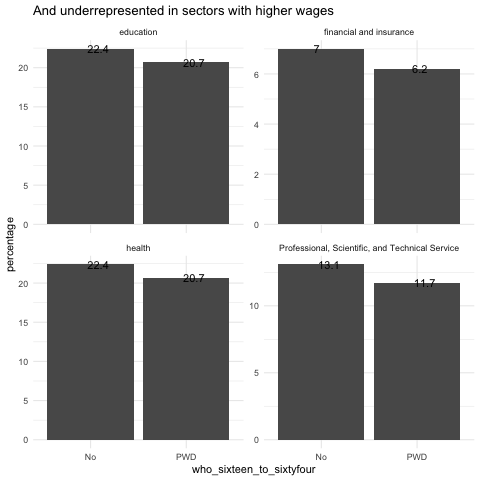

In [111]:
%%R

ggplot(underrepresented_df, aes(y=percentage, x=who_sixteen_to_sixtyfour)) +
facet_wrap(~subcategory,scales = "free_y") +
  geom_bar(stat = "identity", position = "dodge") +
  geom_col() +
theme_minimal()+
  labs(title="And underrepresented in sectors with higher wages")+
geom_text(aes(label = percentage), hjust = -0.3, nudge_x = -0.1)

In [84]:
%%R

ggsave("underrepresented_df.svg", plot = underrepresented_df, height = 15, width = 10)

In [64]:
%%R -h 1000 -w 1000

overrepresented_df <-  jobtypes_df %>% 
    filter(represented_relative =='overrepresented')

In [85]:
%%R -h 300

overrepresented_df <- ggplot(overrepresented_df , aes(y=percentage, x=who_sixteen_to_sixtyfour)) +
facet_wrap(~subcategory,scales = "free_y") +
  geom_bar(stat = "identity", position = "dodge") +
  geom_col() +
theme_minimal()+
  labs(title="People with disabilities are overrepresented in sectors with lower wages")

In [86]:
%%R

ggsave("overrepresented_df.svg", plot = overrepresented_df, height = 15, width = 10)

In [69]:
%%R

# Read data
eeoc_df <- read_csv('/Users/rachelp/Downloads/Disability - EEOC.csv')

Rows: 5 Columns: 26
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): Year
num (25): 1,997, 1,998, 1,999, 2,000, 2,001, 2,002, 2,003, 2,004, 2,005, 2,0...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [70]:
%%R

# load the "reshape2" package
library(reshape2)
# convert the data from wide to long format
eeoc_df_long <- melt(eeoc_df, id.vars = "Year", variable.name = "Category", value.name = "Value")


In [71]:
%%R

eeoc_df_long <- write_csv(eeoc_df_long, "eeoc_df_long.csv")

`geom_line()`: Each group consists of only one observation.
ℹ Do you need to adjust the group aesthetic?


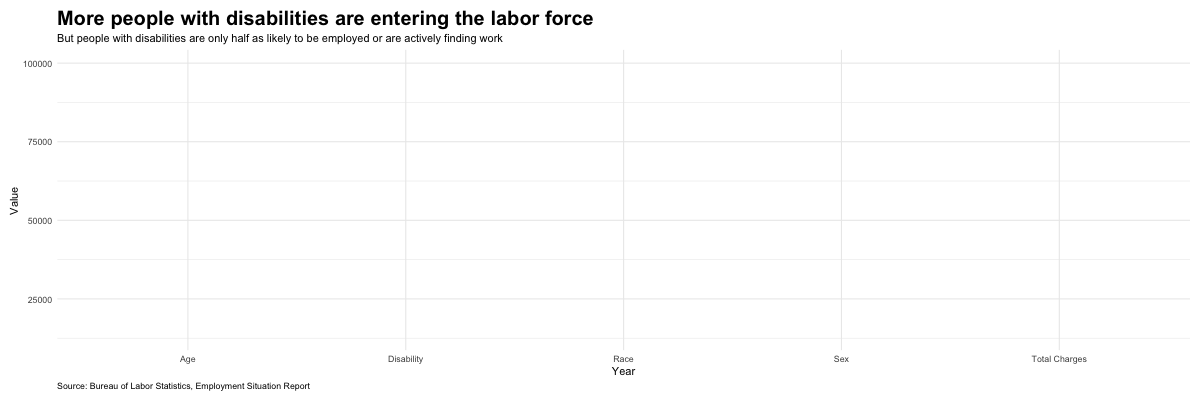

In [72]:
%%R -w 1200 -h 400

ggplot(eeoc_df_long) +
  aes(y = Value, x = Year, color = Category) +
  geom_line() + 
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    plot.margin = margin(10, 10, 10, 10),
    plot.caption = element_text(hjust = 0)
  ) +
  labs(
    title = 'More people with disabilities are entering the labor force',
    subtitle = "But people with disabilities are only half as likely to be employed or are actively finding work",
    caption = "Source: Bureau of Labor Statistics, Employment Situation Report"
  ) +
  theme(legend.position = "none")

In [73]:
%%R

eeoc_df_long <- eeoc_df_long %>%
  filter(Category != "Total_Charges")

In [ ]:
%%R -w 1200 -h 400

ggplot(eeoc_df_long) +
  aes(y = Value, x = Year, color = Category) +
  geom_line() + 
scale_x_continuous(breaks = seq(1997, 2021, by = 3)) +
  theme_minimal() +
  theme(
    plot.title = element_text(size = 20, face = "bold"),
    plot.margin = margin(10, 10, 10, 10),
    plot.caption = element_text(hjust = 0)
  ) +
  labs(
    title = 'Disability-related claims are now the top employment discrimination claims filed',
    subtitle = "Disability discrimination claims rose by 26% over the past 16 years",
    caption = "Source: U.S. Equal Employment Opportunity Commission, Charge Statistics "
  ) +
  theme(legend.position = "none")